In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR


In [ ]:
# Example Blinkit dataset
data = {
    'Item_Weight': [9.3, 5.9, 17.5, 19.2, 8.9, 10.0, 13.5, 7.3, 11.8, 14.5],
    'Item_Fat_Content': ['Low Fat', 'Regular', 'Low Fat', 'Low Fat', 'Regular', 'Low Fat', 'Regular', 'Low Fat', 'Regular', 'Low Fat'],
    'Item_Visibility': [0.016, 0.019, 0.016, 0.020, 0.018, 0.022, 0.015, 0.021, 0.017, 0.023],
    'Item_Type': ['Dairy', 'Soft Drinks', 'Meat', 'Fruits', 'Household', 'Frozen Foods', 'Snack Foods', 'Breakfast', 'Baking Goods', 'Canned'],
    'Item_MRP': [249.8, 48.3, 141.6, 182.1, 53.8, 214.3, 57.3, 194.6, 45.3, 39.3],
    'Outlet_Establishment_Year': [1999, 2009, 1999, 1998, 1987, 2009, 1985, 1999, 1985, 2002],
    'Outlet_Size': ['Medium', 'Small', 'Medium', 'High', 'Small', 'Medium', 'High', 'Small', 'High', 'Small'],
    'Outlet_Location_Type': ['Tier 1', 'Tier 2', 'Tier 3', 'Tier 2', 'Tier 1', 'Tier 3', 'Tier 2', 'Tier 1', 'Tier 3', 'Tier 1'],
    'Outlet_Type': ['Supermarket Type1', 'Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type1',
                    'Supermarket Type1', 'Supermarket Type3', 'Supermarket Type2', 'Supermarket Type1', 'Grocery Store'],
    'Item_Outlet_Sales': [3735, 443, 2097, 732, 995, 1540, 2353, 1126, 248, 151]
}

df = pd.DataFrame(data)
print(" Dataset Loaded Successfully!")
df.head()


 Dataset Loaded Successfully!


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.3,Low Fat,0.016,Dairy,249.8,1999,Medium,Tier 1,Supermarket Type1,3735
1,5.9,Regular,0.019,Soft Drinks,48.3,2009,Small,Tier 2,Grocery Store,443
2,17.5,Low Fat,0.016,Meat,141.6,1999,Medium,Tier 3,Supermarket Type1,2097
3,19.2,Low Fat,0.020,Fruits,182.1,1998,High,Tier 2,Supermarket Type2,732
4,8.9,Regular,0.018,Household,53.8,1987,Small,Tier 1,Supermarket Type1,995


In [ ]:
# Exploratory data Analysis
# 1.Basic info
print("Shape of dataset:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())


Shape of dataset: (10, 10)

Data Types:
 Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales              int64
dtype: object

Missing Values:
 Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [ ]:
#2.Descriptive Statistics
print("\nSummary Statistics:")
print(df.describe())



Summary Statistics:
       Item_Weight  Item_Visibility   Item_MRP  Outlet_Establishment_Year  \
count    10.000000        10.000000   10.00000                  10.000000   
mean     11.790000         0.018700  122.64000                1997.200000   
std       4.351105         0.002751   82.39887                   8.904431   
min       5.900000         0.015000   39.30000                1985.000000   
25%       9.000000         0.016250   49.67500                1989.750000   
50%      10.900000         0.018500   99.45000                1999.000000   
75%      14.250000         0.020750  191.47500                2001.250000   
max      19.200000         0.023000  249.80000                2009.000000   

       Item_Outlet_Sales  
count          10.000000  
mean         1342.000000  
std          1121.530799  
min           151.000000  
25%           515.250000  
50%          1060.500000  
75%          1957.750000  
max          3735.000000  


In [ ]:
#3.Value Counts
print("\nOutlet Type Distribution:")
print(df['Outlet_Type'].value_counts())



Outlet Type Distribution:
Outlet_Type
Supermarket Type1    5
Grocery Store        2
Supermarket Type2    2
Supermarket Type3    1
Name: count, dtype: int64


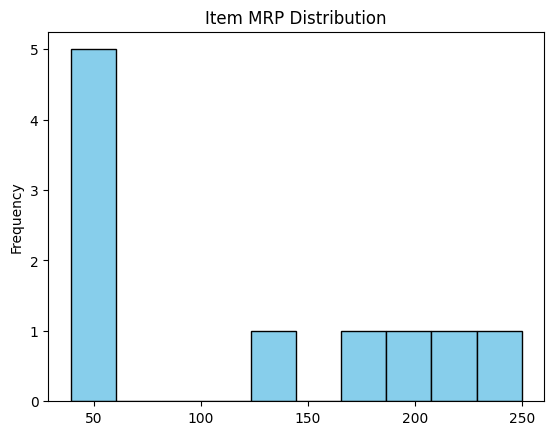

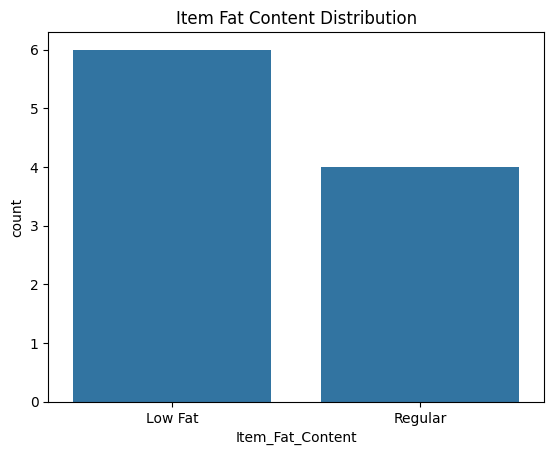

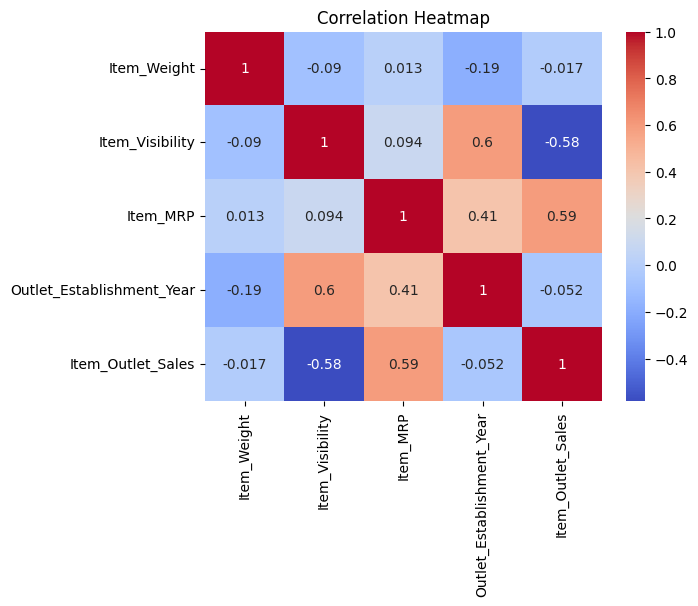

In [ ]:
#4.Visual EDA
# Histogram
df['Item_MRP'].plot(kind='hist', bins=10, color='skyblue', edgecolor='black', title='Item MRP Distribution')
plt.show()

# Countplot for Item Fat Content
sns.countplot(x='Item_Fat_Content', data=df)
plt.title("Item Fat Content Distribution")
plt.show()

# Correlation heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



In [ ]:
# Data Preprocessing

# Encode categorical columns
le = LabelEncoder()
for col in ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']:
    df[col] = le.fit_transform(df[col])

# Features (X) and target (y)
X = df.drop('Item_Outlet_Sales', axis=1)
y_reg = df['Item_Outlet_Sales']  # For Regression
y_clf = np.where(df['Item_Outlet_Sales'] > df['Item_Outlet_Sales'].mean(), 1, 0)  # For Classification

# Split data
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
X_train, X_test, y_train_clf, y_test_clf = train_test_split(X, y_clf, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Classsificaton models
# Define models
classification_models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

# Train and Evaluate
print("CLASSIFICATION RESULTS:\n")
for name, model in classification_models.items():
    model.fit(X_train, y_train_clf)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test_clf, y_pred)
    print(f"{name} Accuracy: {acc:.3f}")


CLASSIFICATION RESULTS:

Logistic Regression Accuracy: 0.000
Decision Tree Accuracy: 0.500
Random Forest Accuracy: 0.500
Support Vector Machine Accuracy: 0.500


In [ ]:
# Regression Models
# Define models
regression_models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regressor": SVR()
}

# Train and Evaluate
print("\nREGRESSION RESULTS:\n")
for name, model in regression_models.items():
    model.fit(X_train, y_train_reg)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test_reg, y_pred)
    mae = mean_absolute_error(y_test_reg, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred))
    print(f"{name} → R²: {r2:.3f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}")



REGRESSION RESULTS:

Linear Regression → R²: -723.715, MAE: 2560.13, RMSE: 2624.75
Decision Tree → R²: -44.376, MAE: 649.50, RMSE: 656.78
Random Forest → R²: -111.900, MAE: 966.52, RMSE: 1035.98
Support Vector Regressor → R²: -102.562, MAE: 987.40, RMSE: 992.21
